# Step 1: Importing and reading of the data

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

#Ignoring warning commands
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [2]:
#Importing the dataset
df_leads=pd.read_csv("Leads.csv")

In [3]:
#Checking the dataset
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Checking the number of rows and columns present in the dataset
df_leads.shape

(9240, 37)

In [5]:
#Checking the statistical features of the dataset
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#Checking for info of each column
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Step 2: Data cleaning and EDA

In [7]:
#Checking the number of null values in each column
((df_leads.isnull().sum())*100/df_leads.shape[0]).sort_values(ascending = False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [8]:
#Dropping the columns which have null values greater than 40%
for col in df_leads.columns:
    null_percentage = (df_leads[col].isnull().sum()) * 100 / (df_leads.shape[0])
    if null_percentage > 40.00:
        df_leads.drop(col, axis=1, inplace=True)

In [9]:
#Checking the remaining columns
((df_leads.isnull().sum()) * 100 / (df_leads.shape[0])).sort_values(ascending=False)

Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Prospect ID                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.0000

In [10]:
df_leads.shape

(9240, 32)

In [11]:
df_leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### The columns 'City' and 'Country' won't be of any use in our analysis because the Company X Education sells online courses to industry professionals. So it's best that we drop it.

In [12]:
df_leads.drop(['City'], axis = 1, inplace = True)

In [13]:
df_leads.drop(['Country'], axis = 1, inplace = True)

In [14]:
df_leads.shape

(9240, 30)

In [15]:
#Checking the value counts of all the categorical variables using a 'for-loop'
for col in df_leads:
    print("*************************************************")
    print(round(100*(df_leads[col].astype('category').value_counts(normalize = True, dropna = False)),2))

*************************************************
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    0.01
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    0.01
aa27a0af-eeab-4007-a770-fa8a93fa53c8    0.01
aa30ebb2-8476-41ce-9258-37cc025110d3    0.01
aa405742-17ac-4c65-b19e-ab91c241cc53    0.01
                                        ... 
539eb309-df36-4a89-ac58-6d3651393910    0.01
539ffa32-1be7-4fe1-b04c-faf1bab763cf    0.01
53aabd84-5dcc-4299-bbe3-62f3764b07b1    0.01
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    0.01
fffb0e5e-9f92-4017-9f42-781a69da4154    0.01
Name: Prospect ID, Length: 9240, dtype: float64
*************************************************
579533    0.01
629593    0.01
630390    0.01
630403    0.01
630405    0.01
          ... 
602534    0.01
602540    0.01
602557    0.01
602561    0.01
660737    0.01
Name: Lead Number, Length: 9240, dtype: float64
*************************************************
Landing Page Submission    52.88
API                        38.74
Lead Add Form               

From the above dataset, we can see that the data of a few columns are extremely imbalanced. For machine learning models, imbalanced/skewed data leads to inefficient predictions/results. Therefore, we will drop such columns with have maximum 'null/select' values or highly imbalanced/skweded data, keeping in mind the usability of such columns from the data dictionary.

In [16]:
#creating a list of columns to be dropped
cols_to_drop=(['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'What matters most to you in choosing a course', 'Do Not Call']) 

In [17]:
df_leads.drop(df_leads[cols_to_drop], axis = 1, inplace = True)

In [18]:
#Checking the shape of the dataset after dropping the columns
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Tags,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Interested in other courses,Select,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Ringing,Select,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Will revert after reading the email,Potential Lead,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Ringing,Select,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Will revert after reading the email,Select,No,Modified


In [19]:
#Checking the number of rows and columns remaining
df_leads.shape

(9240, 17)

#### Handling missing values:

#### NOTE: In the dataset, we can see that there are a few columns with 'Select' as a value. This means that the person filling the form had not selected the option for that particular column. These values are as good as missing values and hence we will convert 'Select' values to Nan.

In [20]:
df_leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
How did you hear about X Education        2207
What is your current occupation           2690
Tags                                      3353
Lead Profile                              2709
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

Lead Source

In [21]:
#Checking the number of and frequency of unique values present in the column
df_leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

- Here, we can see that google is present in 2 ways: 'Google' and 'google'. We have to club both together.
- Also, the mode of the values is 'Google'. Therefore, we will replace the missing values with the same.
- There are a number of categories having minimal values. This will increase complexity and reduce readability of the model. Therefore, we will re-classify them as 'Others'.

In [22]:
#Clubbing 'google' and 'Google' together
df_leads['Lead Source'] = df_leads['Lead Source'].replace('google','Google')

In [23]:
#Replacing Nan with Google
df_leads['Lead Source'] = df_leads['Lead Source'].replace(np.nan,'Google')

In [24]:
#Re-classifying the low frequency categories to 'Others'
df_leads['Lead Source'] = df_leads['Lead Source'].replace(['bing','Click2call','Press_Release', 'Social Media', 'Live Chat', 'youtubechannel', 'testone', 'Pay per Click Ads', 'welearnblog_Home', 'WeLearn', 'blog', 'NC_EDM',] ,'Others')

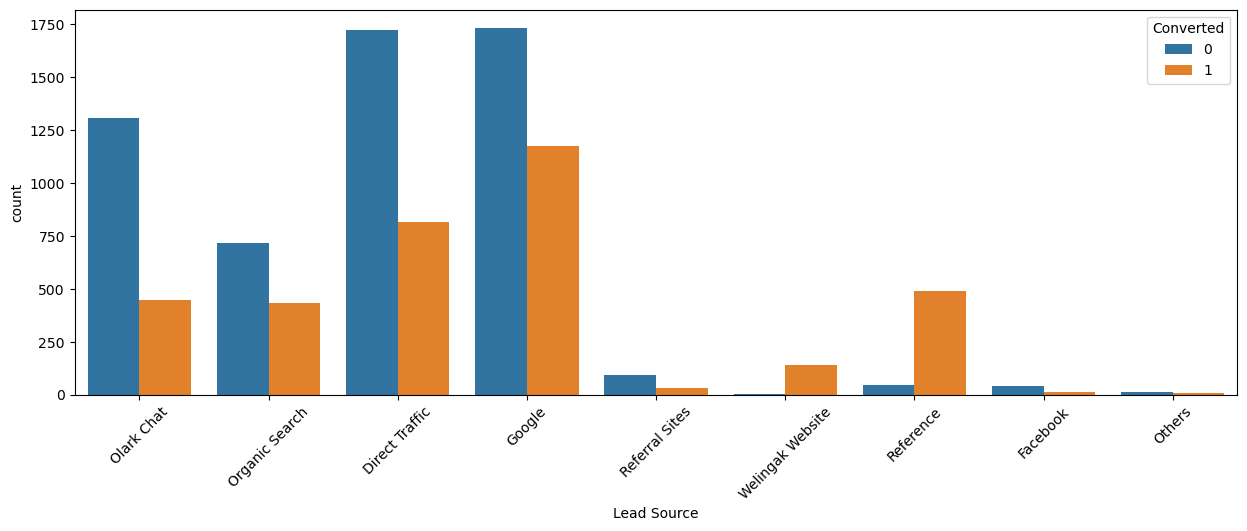

In [25]:
#Visualizing the count of 'Lead Source' column with respect to the target variable 'Converted'
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Lead Source', hue='Converted' , data =df_leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

Observation:

- Maximum Leads are generated by Google and Direct Traffic, followed by Olark Chat.
- Conversion rate of Reference leads and Welinkgak Website leads is very high.

Total Visits

In [26]:
#Checking the number of and frequency of unique values present in the column
round(100*(df_leads['TotalVisits'].value_counts(normalize = True, dropna = False)),2)

0.0      23.69
2.0      18.18
3.0      14.13
4.0      12.12
5.0       8.47
6.0       5.04
1.0       4.27
7.0       3.34
8.0       2.42
9.0       1.77
NaN       1.48
10.0      1.23
11.0      0.93
13.0      0.52
12.0      0.49
14.0      0.39
16.0      0.23
15.0      0.19
17.0      0.17
18.0      0.16
20.0      0.13
19.0      0.10
21.0      0.06
23.0      0.06
24.0      0.05
25.0      0.05
27.0      0.05
22.0      0.03
29.0      0.02
28.0      0.02
26.0      0.02
141.0     0.01
55.0      0.01
30.0      0.01
43.0      0.01
74.0      0.01
41.0      0.01
54.0      0.01
115.0     0.01
251.0     0.01
32.0      0.01
42.0      0.01
Name: TotalVisits, dtype: float64

Since null values are extremely less, 1.48% of the total values present, we can replace them with the mode value (0.0)

In [27]:
df_leads['TotalVisits'] = df_leads['TotalVisits'].fillna(0.0)

In [28]:
#Checking the unique values after replacing the missing values above
df_leads['TotalVisits'].value_counts(normalize = True, dropna = False)

0.0      0.251732
2.0      0.181818
3.0      0.141342
4.0      0.121212
5.0      0.084740
6.0      0.050433
1.0      0.042749
7.0      0.033442
8.0      0.024242
9.0      0.017749
10.0     0.012338
11.0     0.009307
13.0     0.005195
12.0     0.004870
14.0     0.003896
16.0     0.002273
15.0     0.001948
17.0     0.001732
18.0     0.001623
20.0     0.001299
19.0     0.000974
21.0     0.000649
23.0     0.000649
24.0     0.000541
25.0     0.000541
27.0     0.000541
22.0     0.000325
29.0     0.000216
28.0     0.000216
26.0     0.000216
141.0    0.000108
55.0     0.000108
30.0     0.000108
43.0     0.000108
74.0     0.000108
41.0     0.000108
54.0     0.000108
115.0    0.000108
251.0    0.000108
32.0     0.000108
42.0     0.000108
Name: TotalVisits, dtype: float64

Page Views Per Visit

In [29]:
#Checking the number of and frequency of unique values present in the column
round(100*(df_leads['Page Views Per Visit'].value_counts(normalize = True, dropna = False)),2)

0.00    23.69
2.00    19.43
3.00    12.94
4.00     9.70
1.00     7.05
        ...  
2.56     0.01
6.33     0.01
1.64     0.01
8.21     0.01
2.08     0.01
Name: Page Views Per Visit, Length: 115, dtype: float64

In [30]:
#Checking for null values in 'Page Views Per Visit' column:
df_leads['Page Views Per Visit'].isnull().sum()

137

In [31]:
#Replacing the null values with the mode value (0.00)
df_leads['Page Views Per Visit'] = df_leads['Page Views Per Visit'].fillna(0.00)

In [32]:
#Checking for null values after replacing the missing values above
df_leads['Page Views Per Visit'].isnull().sum()

0

Last Activity

In [33]:
#Checking the number of and frequency of unique values present in the column
round(100*(df_leads['Last Activity'].value_counts(normalize = True, dropna = False)),2)

Email Opened                    37.20
SMS Sent                        29.71
Olark Chat Conversation         10.53
Page Visited on Website          6.93
Converted to Lead                4.63
Email Bounced                    3.53
Email Link Clicked               2.89
Form Submitted on Website        1.26
NaN                              1.11
Unreachable                      1.01
Unsubscribed                     0.66
Had a Phone Conversation         0.32
Approached upfront               0.10
View in browser link Clicked     0.06
Email Received                   0.02
Email Marked Spam                0.02
Visited Booth in Tradeshow       0.01
Resubscribed to emails           0.01
Name: Last Activity, dtype: float64

In [34]:
#Replacing the null values with the mode value (Email Opened)
df_leads['Last Activity'] = df_leads['Last Activity'].fillna('Email Opened')

In [35]:
#Checking for null values after replacing the missing values above
df_leads['Last Activity'].isnull().sum()

0

In [36]:
#combining low frequency values
df_leads['Last Activity'] = df_leads['Last Activity'].replace(['Unreachable','Unsubscribed', 'Had a Phone Conversation', 'Approached upfront', 'View in browser link Clicked', 'Email Received', 'Email Marked Spam', 'Visited Booth in Tradeshow', 'Resubscribed to emails'],'Others')

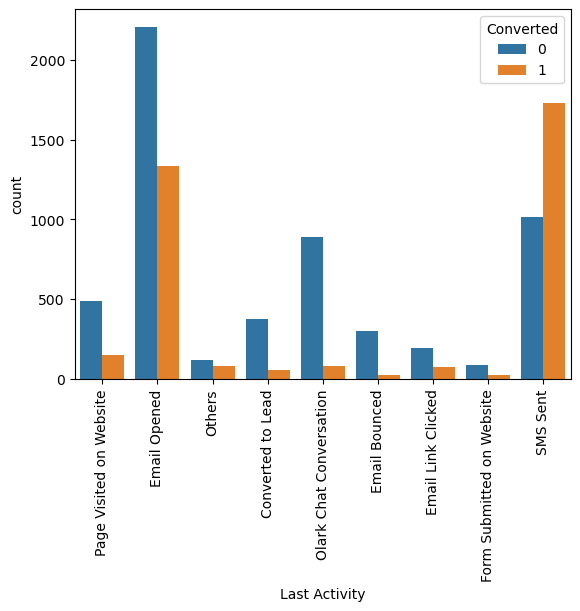

In [37]:
#visualizing the column with respect to the 'Converted' variable
s1=sns.countplot(x='Last Activity', hue='Converted' , data = df_leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Observation: 
    
    - Leads who opened e-mails and received SMS-es have higher conversion rates.

Specialization

In [38]:
#Checking the number of and frequency of unique values present in the column
round(100*(df_leads['Specialization'].value_counts(normalize = True, dropna = False)),2)

Select                               21.02
NaN                                  15.56
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Travel and Tourism                    2.20
Media and Advertising                 2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: Specialization, dtype: float64

In [39]:
#Replacing 'NaN' with 'Select'
df_leads['Specialization'] = df_leads['Specialization'].fillna('Select')

In [40]:
#Replacing 'Select' with 'Not Specified'
df_leads['Specialization'] = df_leads['Specialization'].replace('Select','Not Specified')

In [41]:
#Checking the column post the modifications
round(100*(df_leads['Specialization'].value_counts(normalize = True, dropna = False)),2)

Not Specified                        36.58
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Travel and Tourism                    2.20
Media and Advertising                 2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: Specialization, dtype: float64

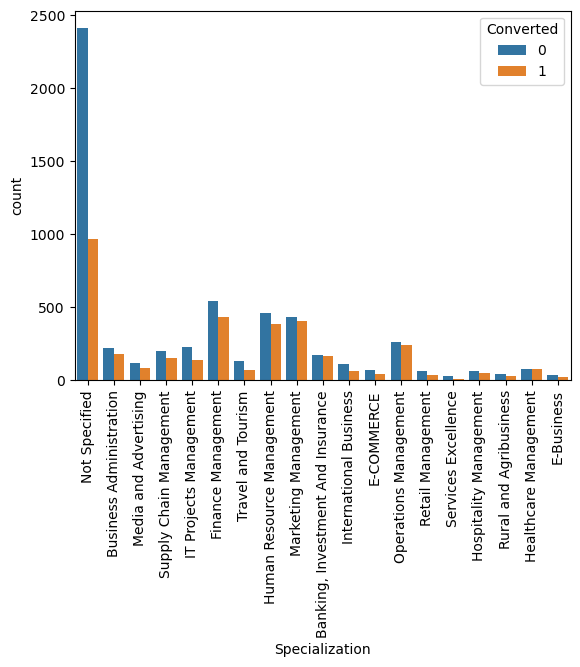

In [42]:
#visualizing the column with respect to the 'Converted' variable
s1=sns.countplot(x='Specialization', hue='Converted' , data = df_leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Observation: 
    
    - Working professionals from Finance, HR, Marketing and Operations Management have more than 50% conversion rates.
    - The leads generated are, however, not too much from these sources. The ambiguity remains due to unproportionately high unspecified values.

How did you hear about X Education

In [43]:
#Checking the number of and frequency of unique values present in the column
round(100*(df_leads['How did you hear about X Education'].value_counts(normalize = True, dropna = False)),2)

Select                   54.58
NaN                      23.89
Online Search             8.74
Word Of Mouth             3.77
Student of SomeSchool     3.35
Other                     2.01
Multiple Sources          1.65
Advertisements            0.76
Social Media              0.73
Email                     0.28
SMS                       0.25
Name: How did you hear about X Education, dtype: float64

In [44]:
#Replacing 'NaN' with 'Select'
df_leads['How did you hear about X Education'] = df_leads['How did you hear about X Education'].fillna('Select')

In [45]:
#Replacing 'Select' with 'Not Specified'
df_leads['How did you hear about X Education'] = df_leads['How did you hear about X Education'].replace('Select','Not Specified')

In [46]:
#Checking the column post the modifications
round(100*(df_leads['How did you hear about X Education'].value_counts(normalize = True, dropna = False)),2)

Not Specified            78.46
Online Search             8.74
Word Of Mouth             3.77
Student of SomeSchool     3.35
Other                     2.01
Multiple Sources          1.65
Advertisements            0.76
Social Media              0.73
Email                     0.28
SMS                       0.25
Name: How did you hear about X Education, dtype: float64

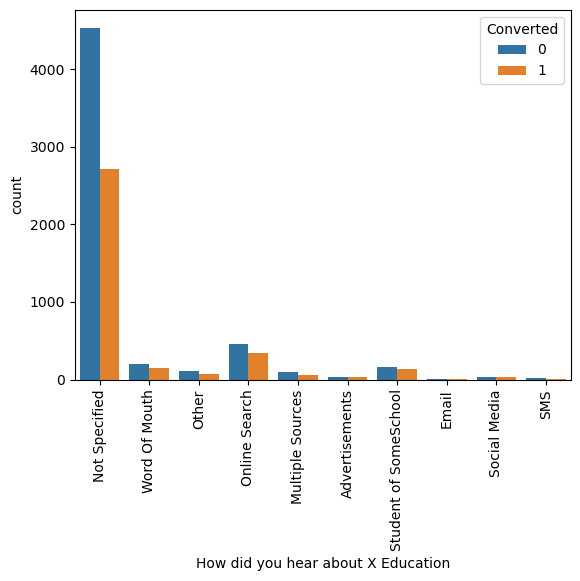

In [47]:
#visualizing the column with respect to the 'Converted' variable
s1=sns.countplot(x='How did you hear about X Education', hue='Converted' , data = df_leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Observation: 
    
    - The data is insufficient to determine the lead source. 
    - Online search has an appreciable amount of leads generated with respect to the leads converted.

What is your current occupation

In [48]:
#Checking the number of and frequency of unique values present in the column
round(100*(df_leads['What is your current occupation'].value_counts(normalize = True, dropna = False)),2)

Unemployed              60.61
NaN                     29.11
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: What is your current occupation, dtype: float64

In [49]:
#Creating new category 'Not provided'
df_leads['What is your current occupation'] = df_leads['What is your current occupation'].replace(np.nan, 'Not provided')

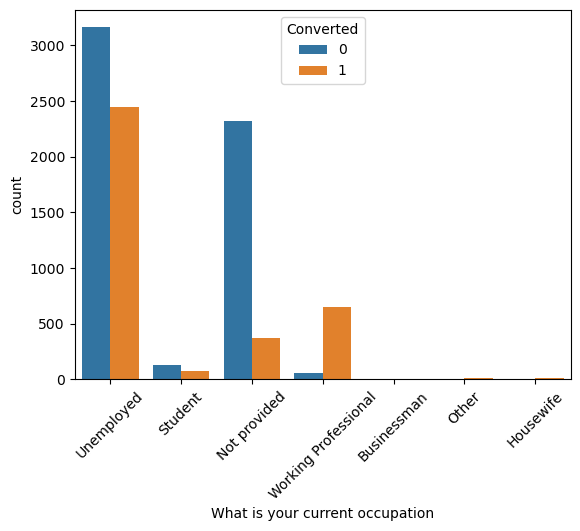

In [50]:
#visualizing the column with respect to the 'Converted' variable
s1=sns.countplot(x='What is your current occupation', hue='Converted' , data = df_leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

Observation: 
    
    - Maximum leads generated are unemployed and have a conversion rate of more than 50%.
    - Conversion rate of working professionals is very high.

Tags

In [51]:
#Checking the number of and frequency of unique values present in the column
round(100*(df_leads['Tags'].value_counts(normalize = True, dropna = False)),2)

NaN                                                  36.29
Will revert after reading the email                  22.42
Ringing                                              13.02
Interested in other courses                           5.55
Already a student                                     5.03
Closed by Horizzon                                    3.87
switched off                                          2.60
Busy                                                  2.01
Lost to EINS                                          1.89
Not doing further education                           1.57
Interested  in full time MBA                          1.27
Graduation in progress                                1.20
invalid number                                        0.90
Diploma holder (Not Eligible)                         0.68
wrong number given                                    0.51
opp hangup                                            0.36
number not provided                                   0.

In [52]:
# Replacing NaN value with "Not Specified"
df_leads['Tags'] = df_leads['Tags'].replace(np.NaN, "Not Specified")

In [53]:
# Checking value counts of 'Tags' column
round(100*(df_leads['Tags'].value_counts(normalize = True, dropna = False)),2)

Not Specified                                        36.29
Will revert after reading the email                  22.42
Ringing                                              13.02
Interested in other courses                           5.55
Already a student                                     5.03
Closed by Horizzon                                    3.87
switched off                                          2.60
Busy                                                  2.01
Lost to EINS                                          1.89
Not doing further education                           1.57
Interested  in full time MBA                          1.27
Graduation in progress                                1.20
invalid number                                        0.90
Diploma holder (Not Eligible)                         0.68
wrong number given                                    0.51
opp hangup                                            0.36
number not provided                                   0.

In [54]:
#combining low frequency values
df_leads['Tags'] = df_leads['Tags'].replace(['invalid number','Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup', 'number not provided', 'in touch with EINS', 'Lost to Others', 'Still Thinking', 'Want to take admission but has financial problems', 'In confusion whether part time or DLP',
'Interested in Next batch', 'Lateral student', 'Shall take in the next coming month', 'University not recognized', 'Recognition issue (DEC approval)'], 'Others')

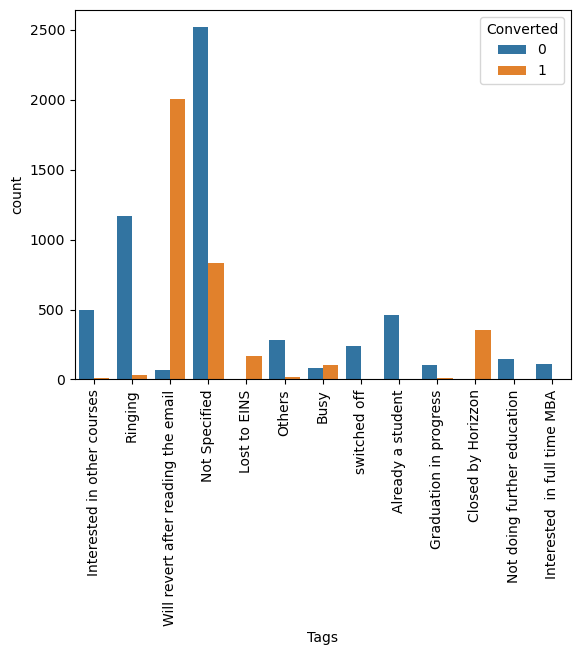

In [55]:
#visualizing the column with respect to the 'Converted' variable
s1=sns.countplot(x='Tags', hue='Converted' , data = df_leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Observation: 
    
    - Leads who responded saying they would revert after reading the email were the ones who converted the most. 
    - Customers tagged as Lost to EINS, Busy and Closed by Horizzon also had lower lead generated, but high conversion rate.

Lead Profile

In [56]:
#Checking the number of and frequency of unique values present in the column
round(100*(df_leads['Lead Profile'].value_counts(normalize = True, dropna = False)),2)

Select                         44.87
NaN                            29.32
Potential Lead                 17.46
Other Leads                     5.27
Student of SomeSchool           2.61
Lateral Student                 0.26
Dual Specialization Student     0.22
Name: Lead Profile, dtype: float64

In [57]:
#Replacing 'NaN' with 'Select'
df_leads['Lead Profile'] = df_leads['Lead Profile'].fillna('Select')

In [58]:
#Replacing 'Select' with 'Not Specified'
df_leads['Lead Profile'] = df_leads['Lead Profile'].replace('Select','Not Specified')

In [59]:
#Checking the column post the modifications
round(100*(df_leads['Lead Profile'].value_counts(normalize = True, dropna = False)),2)

Not Specified                  74.19
Potential Lead                 17.46
Other Leads                     5.27
Student of SomeSchool           2.61
Lateral Student                 0.26
Dual Specialization Student     0.22
Name: Lead Profile, dtype: float64

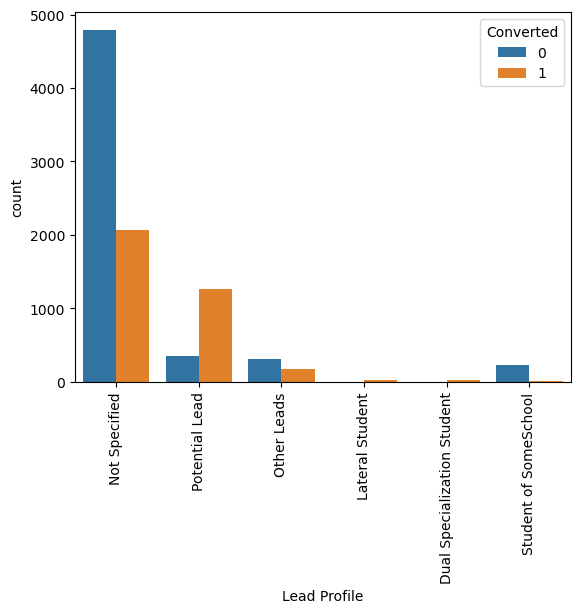

In [60]:
#visualizing the column with respect to the 'Converted' variable
s1=sns.countplot(x='Lead Profile', hue='Converted' , data = df_leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Observation: 
    
    - Potential leads are aptly tagged, since they have the highest cobversion rates.
    - The observations are ambigiious due to majority data being unknown.

In [61]:
#Checking the dataset after all the missing value handling
df_leads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
How did you hear about X Education        0
What is your current occupation           0
Tags                                      0
Lead Profile                              0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [62]:
#After observation, we can also drop 'Lead Number' and 'Prospect ID' since they have all unique values and will not help much in machine learning process
df_leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [63]:
#Checking the dataset after dropping of columns
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Tags,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Not Specified,Unemployed,Interested in other courses,Not Specified,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Not Specified,Unemployed,Ringing,Not Specified,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Not Specified,Student,Will revert after reading the email,Potential Lead,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Word Of Mouth,Unemployed,Ringing,Not Specified,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Other,Unemployed,Will revert after reading the email,Not Specified,No,Modified


In [64]:
#Checking the shape of the datasets
df_leads.shape

(9240, 15)

#### Numerical Analysis

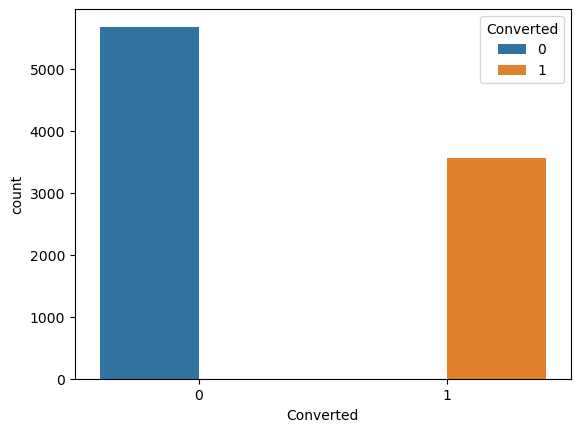

In [65]:
#The target variable is 'Converted', which indicates whether a lead has been successfully converted (1) or not (0).
#Visualizing Distribution of 'Converted' Variable
s1=sns.countplot(x='Converted', hue='Converted' , data = df_leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=0)
plt.show()

In [66]:
# Checking the current conversion rate
Converted = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
Converted

38.53896103896104

### The current lead Conversion rate is 38% only

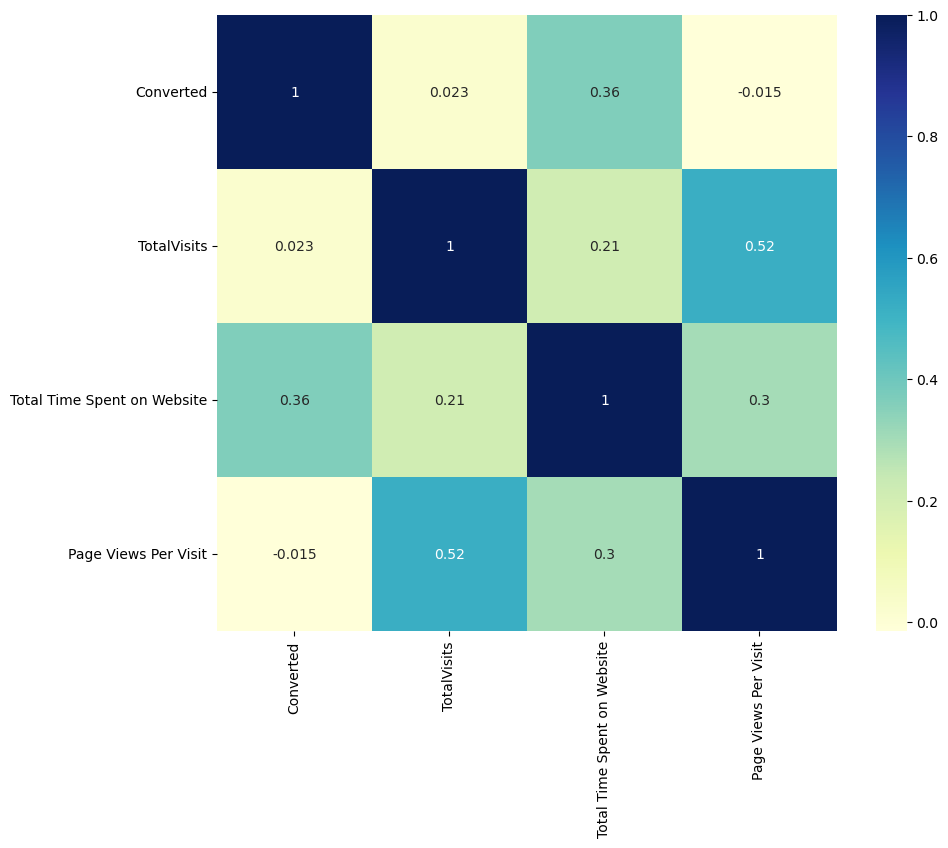

In [67]:
#Checking the collinearity for numeric values of the parameters using a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

# Step 3: Data Preparation

#### Creating dummy variables for non-binary categorical columns

In [68]:
#Checking the dataset before data preparation
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Tags,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Not Specified,Unemployed,Interested in other courses,Not Specified,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Not Specified,Unemployed,Ringing,Not Specified,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Not Specified,Student,Will revert after reading the email,Potential Lead,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Word Of Mouth,Unemployed,Ringing,Not Specified,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Other,Unemployed,Will revert after reading the email,Not Specified,No,Modified


In [69]:
#Checking the shape before creation of dummy variables
df_leads.shape

(9240, 15)

In [70]:
#Mapping the values of the 'Do Not Email' column into 0 and 1
df_leads['Do Not Email'] = df_leads['Do Not Email'].map({'No': 0, 'Yes': 1})

In [71]:
#Mapping the values of the 'Do Not Email' column into 0 and 1
df_leads['A free copy of Mastering The Interview'] = df_leads['A free copy of Mastering The Interview'].map({'No': 0, 'Yes': 1})

In [72]:
#Checking the dataset after the mapping
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Tags,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Not Specified,Unemployed,Interested in other courses,Not Specified,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Not Specified,Unemployed,Ringing,Not Specified,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Not Specified,Student,Will revert after reading the email,Potential Lead,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Word Of Mouth,Unemployed,Ringing,Not Specified,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Other,Unemployed,Will revert after reading the email,Not Specified,0,Modified


In [73]:
#Determining all categorical columns
cat_cols= df_leads.loc[:, df_leads.dtypes=='object']
cat_cols.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'Tags', 'Lead Profile', 'Last Notable Activity'],
      dtype='object')

In [74]:
#Creating dummy variables for non-binary columns
dummy=pd.get_dummies(df_leads[['Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Tags', 'Lead Profile', 'Last Notable Activity']], drop_first = True)

In [75]:
# Adding the  result to the master dataset
df_leads_dummy = pd.concat([df_leads, dummy], axis = 1)
df_leads_dummy

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0,0.00,Page Visited on Website,Not Specified,Not Specified,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.50,Email Opened,Not Specified,Not Specified,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.00,Email Opened,Business Administration,Not Specified,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.00,Others,Media and Advertising,Word Of Mouth,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.00,Converted to Lead,Not Specified,Other,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,1,8.0,1845,2.67,Others,IT Projects Management,Not Specified,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,0,0,2.0,238,2.00,SMS Sent,Media and Advertising,Not Specified,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,1,0,2.0,199,2.00,SMS Sent,Business Administration,Not Specified,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,0,1,3.0,499,3.00,SMS Sent,Human Resource Management,Online Search,...,0,0,0,0,0,0,1,0,0,0


In [76]:
pd.set_option('display.max_rows', None)

df = pd.DataFrame(df_leads_dummy.columns)
df

,0
0,Lead Origin
1,Lead Source
2,Do Not Email
3,Converted
4,TotalVisits
5,Total Time Spent on Website
6,Page Views Per Visit
7,Last Activity
8,Specialization
9,How did you hear about X Education


In [77]:
#Checking the dataset shape after concatenation
df_leads_dummy.shape

(9240, 100)

In [78]:
#Chcking the dataset after the concatenation
df_leads_dummy.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Not Specified,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Not Specified,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Not Specified,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Word Of Mouth,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Other,...,0,0,1,0,0,0,0,0,0,0


In [79]:
#Dropping the original columns
df_leads_dummy = df_leads_dummy.drop(['Lead Origin','Lead Source','Last Activity','Specialization','How did you hear about X Education', 'What is your current occupation', 'Tags', 'Lead Profile', 'Last Notable Activity'], axis=1)

In [80]:
#Checking the final datdset
df_leads_dummy.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Splitting the data into Train & Test sets

In [81]:
# Splitting the entire data into test and train sets of 70-30 ratio
df_leads_train, df_leads_test = train_test_split(df_leads_dummy, train_size = 0.7, test_size= 0.3, random_state = 100)

In [82]:
# Checking the shape of the train and test sets
df_leads_train.shape

(6468, 91)

In [83]:
df_leads_test.shape

(2772, 91)

#### Rescaling the features for modeling purposes

In [84]:
scaler= MinMaxScaler()

In [85]:
# Appling scaler() to all the columns except the 'yes-no' and 'dummy' variables
scal_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [86]:
# Training the program to fit and transform the train data for the model to learn
df_leads_train[scal_vars] = scaler.fit_transform(df_leads_train[scal_vars])

In [87]:
# Checking the datahead
df_leads_train.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,0,0.015936,0.214349,0.024182,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0,0,0.019920,0.046655,0.045455,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,0,0.019920,0.541373,0.090909,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [88]:
# Checking the dataset with the describe() to confirm the scaling
df_leads_train.describe()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0
mean,0.078386,0.381262,0.013633,0.212974,0.042130,0.311843,0.528139,0.079468,0.005102,0.000155,...,0.000155,0.001701,0.367811,0.018553,0.035869,0.000155,0.237477,0.003247,0.004793,0.0
std,0.268799,0.485734,0.021115,0.240566,0.039668,0.463282,0.499246,0.270489,0.071252,0.012434,...,0.012434,0.041207,0.482247,0.134950,0.185978,0.012434,0.425570,0.056892,0.069069,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.005282,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.011952,0.108275,0.036364,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,1.000000,0.019920,0.407790,0.054545,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


#### Dividing the train dataset into X and Y sets for the model building

In [89]:
y_train = df_leads_train.pop('Converted')

In [90]:
X_train = df_leads_train

In [91]:
y_train.head()

1871    0
6795    0
3516    0
8105    0
3934    0
Name: Converted, dtype: int64

In [92]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,0.015936,0.214349,0.024182,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0,0.019920,0.046655,0.045455,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,0.019920,0.541373,0.090909,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


The above outputs proof that we have successfully divided the data into test and train sets

# Step 4: Model Building

### Automated: Since there are a lot of parameters at the moment, we will use RFE to eliminate the lowest ranked parameters and consider only the top 15
RFE: Recursive feature elimination

In [93]:
# Running RFE with the output number of the variable equal to 15
lr = LogisticRegression()

In [94]:
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [95]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 45),
 ('A free copy of Mastering The Interview', False, 75),
 ('Lead Origin_Landing Page Submission', False, 28),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 47),
 ('Lead Origin_Quick Add Form', False, 49),
 ('Lead Source_Facebook', False, 26),
 ('Lead Source_Google', False, 68),
 ('Lead Source_Olark Chat', False, 11),
 ('Lead Source_Organic Search', False, 60),
 ('Lead Source_Others', False, 29),
 ('Lead Source_Reference', False, 53),
 ('Lead Source_Referral Sites', False, 69),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 27),
 ('Last Activity_Email Link Clicked', False, 23),
 ('Last Activity_Email Opened', False, 25),
 ('Last Activity_Form Submitted on Website', False, 42),
 ('Last Activity_Olark Chat Conversation', False, 34),
 ('Last Activity_Others', False, 19),
 ('Last Activity_

In [96]:
#Listing all the columns selected by RFE in variable 'col'

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent',
       'What is your current occupation_Not provided', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Not Specified',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_Modified'],
      dtype='object')

### Manual: Building model using statsmodel, for the detailed statistics

In [97]:
# Creating X_test dataframe with RFE selected variables
X_train = X_train[col]

In [98]:
# Writing the generic function to calculate VIF of variables, using the columns for which VIF has to be calculated
    
def cal_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

Model 1: Considering all 15 variables obtained with RFE

In [99]:
# Building the logistic regression model and running the VIF functions to calculate the parameters
# This reduces redundancy of the program, thus making it concise

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())

cal_VIF(X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1156.7
Date:                Tue, 28 Nov 2023   Deviance:                       2313.3
Time:                        22:06:27   Pearson chi2:                 1.14e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6216
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

,Features,VIF
9,Tags_Not Specified,5.23
5,What is your current occupation_Not provided,4.70
1,Total Time Spent on Website,2.01
11,Tags_Will revert after reading the email,1.96
2,Lead Origin_Lead Add Form,1.75
4,Last Activity_SMS Sent,1.65
14,Last Notable Activity_Modified,1.51
7,Tags_Closed by Horizzon,1.38
3,Lead Source_Welingak Website,1.34
10,Tags_Ringing,1.18


Model 2: Dropping 'Lead Origin_Lead Add Form' column since it has the highest p-value among all the other parameters

In [100]:
# Dropping 'Lead Origin_Lead Add Form' because the p-value is high.

X_train.drop('Lead Origin_Lead Add Form', axis = 1, inplace = True)

In [101]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())

cal_VIF(X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1159.6
Date:                Tue, 28 Nov 2023   Deviance:                       2319.2
Time:                        22:06:27   Pearson chi2:                 1.21e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6212
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

,Features,VIF
8,Tags_Not Specified,5.19
4,What is your current occupation_Not provided,4.67
1,Total Time Spent on Website,1.87
10,Tags_Will revert after reading the email,1.71
3,Last Activity_SMS Sent,1.64
13,Last Notable Activity_Modified,1.50
9,Tags_Ringing,1.18
2,Lead Source_Welingak Website,1.13
6,Tags_Closed by Horizzon,1.13
0,Do Not Email,1.11


Model 3: Dropping 'Lead Profile_Student of SomeSchool' column since it has the highest p-value among all the other parameters

In [102]:
# Dropping 'Lead Profile_Student of SomeSchool' because the p-value is high.

X_train.drop('Lead Profile_Student of SomeSchool', axis = 1, inplace = True)

In [103]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())

cal_VIF(X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1163.8
Date:                Tue, 28 Nov 2023   Deviance:                       2327.7
Time:                        22:06:28   Pearson chi2:                 1.20e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6207
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

,Features,VIF
8,Tags_Not Specified,5.18
4,What is your current occupation_Not provided,4.67
1,Total Time Spent on Website,1.86
10,Tags_Will revert after reading the email,1.70
3,Last Activity_SMS Sent,1.64
12,Last Notable Activity_Modified,1.48
9,Tags_Ringing,1.18
2,Lead Source_Welingak Website,1.13
6,Tags_Closed by Horizzon,1.12
0,Do Not Email,1.11


Model 4: Dropping 'Tags_Not Specified' column since it has the highest VIF value among all the other parameters

In [104]:
# Dropping 'Tags_Not Specified' because the VIF value is high.

X_train.drop('Tags_Not Specified', axis = 1, inplace = True)

In [105]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())

cal_VIF(X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1383.9
Date:                Tue, 28 Nov 2023   Deviance:                       2767.8
Time:                        22:06:28   Pearson chi2:                 1.31e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5940
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

,Features,VIF
1,Total Time Spent on Website,1.78
9,Tags_Will revert after reading the email,1.62
3,Last Activity_SMS Sent,1.57
11,Last Notable Activity_Modified,1.47
4,What is your current occupation_Not provided,1.39
8,Tags_Ringing,1.16
6,Tags_Closed by Horizzon,1.11
0,Do Not Email,1.10
5,Tags_Busy,1.06
7,Tags_Lost to EINS,1.05


Model 5: Dropping 'Tags_Busy' column since it has the highest p-value among all the other parameters

In [106]:
# Dropping 'Tags_Not Specified' because the VIF value is high.

X_train.drop('Tags_Busy', axis = 1, inplace = True)

In [107]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())

cal_VIF(X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1384.2
Date:                Tue, 28 Nov 2023   Deviance:                       2768.5
Time:                        22:06:28   Pearson chi2:                 1.32e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5940
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

,Features,VIF
1,Total Time Spent on Website,1.75
8,Tags_Will revert after reading the email,1.59
3,Last Activity_SMS Sent,1.53
10,Last Notable Activity_Modified,1.47
4,What is your current occupation_Not provided,1.38
7,Tags_Ringing,1.15
5,Tags_Closed by Horizzon,1.11
0,Do Not Email,1.10
6,Tags_Lost to EINS,1.04
9,Tags_switched off,1.04


### Creating Prediction

In [108]:
# Predict the probabilities on the  train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.003793
6795    0.216374
3516    0.004410
8105    0.166767
3934    0.025473
4844    0.999025
3297    0.004280
8071    0.991255
987     0.036542
7423    0.999106
dtype: float64

In [109]:
# Reshaping it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00379308, 0.21637404, 0.00440954, 0.16676707, 0.02547347,
       0.9990247 , 0.00427996, 0.99125527, 0.03654222, 0.99910591])

In [110]:
# Data frame with given conversion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Conversion_prob': y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_prob
0,0,0.003793
1,0,0.216374
2,0,0.004410
3,0,0.166767
4,0,0.025473


In [111]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,Predicted
0,0,0.003793,0
1,0,0.216374,0
2,0,0.004410,0
3,0,0.166767,0
4,0,0.025473,0


### Model Evaluation

In [112]:
# Creating confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3826,  176],
       [ 342, 2124]], dtype=int64)

In [113]:
# Checking for the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9199134199134199

In [114]:
# Value of true positive - TP
TP = confusion[1,1]
# Value of true negative - TN
TN = confusion[0,0]
# Value of false positive - FP
FP = confusion[0,1]
# Value of false negative - FN
FN = confusion[1,0]

In [115]:
# Calculating the  sensitivity
TP/(TP+FN)

0.8613138686131386

In [116]:
# Calculating the specificity
TN/(TN+FP)

0.9560219890054973

### Plotting ROC Curve

In [117]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize = (5, 5))
    plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = 'lower right')
    plt.show()

In [118]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final['Converted'], y_train_pred_final['Conversion_prob'], drop_intermediate = False)

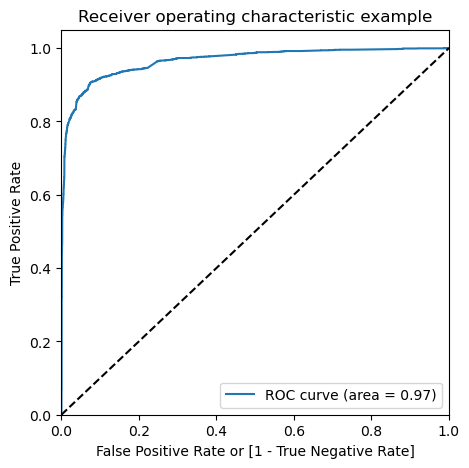

In [119]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Conversion_prob'])

Observation: The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.

### Finding Optimal cutoff point

#### The following steps need to be followed to determine the best cut off value

In [120]:
#Creating columns with different probability cutoff.

number = [float(x)/10 for x in range (10)]
for i in number:
    y_train_pred_final[i] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

,Converted,Conversion_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.003793,0,1,0,0,0,0,0,0,0,0,0
1,0,0.216374,0,1,1,1,0,0,0,0,0,0,0
2,0,0.004410,0,1,0,0,0,0,0,0,0,0,0
3,0,0.166767,0,1,1,0,0,0,0,0,0,0,0
4,0,0.025473,0,1,0,0,0,0,0,0,0,0,0


In [121]:
# Now let's calculate accuracy sensitivity and specificity for various  probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.818336  0.967153  0.726637
0.2   0.2  0.897805  0.923358  0.882059
0.3   0.3  0.916512  0.907948  0.921789
0.4   0.4  0.918367  0.879562  0.942279
0.5   0.5  0.919913  0.861314  0.956022
0.6   0.6  0.914193  0.826034  0.968516
0.7   0.7  0.912801  0.805353  0.979010
0.8   0.8  0.903525  0.768045  0.987006
0.9   0.9  0.886209  0.716139  0.991004


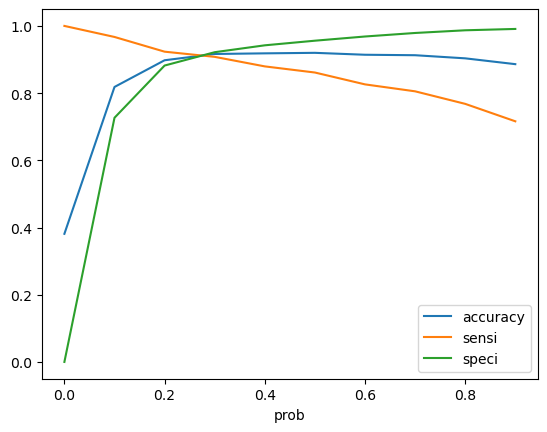

In [122]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line( x = 'prob', y = ['accuracy', 'sensi', 'speci'])
plt.show()

Observation: Based on the above plot, the cut-off should be somewhere around 0.28

In [123]:
# From the  curve above ,  0.28 is the  optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Conversion_prob.map( lambda x: 1 if x > 0.28 else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.003793,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.216374,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.004410,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.166767,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.025473,0,1,0,0,0,0,0,0,0,0,0,0


In [124]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_prob.map(lambda x: round(x*100))
y_train_pred_final[['Converted','Conversion_prob','final_Predicted','Lead_Score']].head()

,Converted,Conversion_prob,final_Predicted,Lead_Score
0,0,0.003793,0,0
1,0,0.216374,0,22
2,0,0.004410,0,0
3,0,0.166767,0,17
4,0,0.025473,0,3


In [125]:
# Checking the overalll accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9132653061224489

In [126]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)
confusion2

array([[3665,  337],
       [ 224, 2242]], dtype=int64)

In [127]:
TP = confusion2[1,1] # true positives
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [128]:
# let's see the  sensitivity of our  logistic regression model
TP / float(TP+FN)

0.9091646390916464

In [129]:
# Let us calculate specificity
TN / float(TN+FP)

0.915792103948026

### Prediction on Test Set

In [130]:
# Training the program to fit and transform the test data for the model to learn
df_leads_test[scal_vars] = scaler.transform(df_leads_test[scal_vars])

In [131]:
# Dividing the test data into X and y sets
y_test = df_leads_test.pop('Converted')
X_test = df_leads_test

In [132]:
# Substituting all  the  columns in  the final train model.
col = X_train.columns

In [133]:
# Selecting the columns in X_train for X_test
X_test = X_test[col]

# adding a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm.shape

(2772, 12)

In [134]:
#  Storing prediction of test set in the  variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Converting it to a dataframe
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)

# Removing index for both dataframe to append them side by  side
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# append y_test_df and  y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df], axis=1)

# Renaming column
y_pred_final = y_pred_final.rename(columns = {0 : 'Conversion_prob'})
y_pred_final.head()

,Converted,Conversion_prob
0,1,0.706334
1,1,0.991749
2,1,0.934983
3,0,0.025473
4,1,0.929675


In [135]:
# Making predictionn using cut off 0.28
y_pred_final['final_predicted'] = y_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.28 else 0)
y_pred_final.head()

,Converted,Conversion_prob,final_predicted
0,1,0.706334,1
1,1,0.991749,1
2,1,0.934983,1
3,0,0.025473,0
4,1,0.929675,1


In [136]:
# Check the  overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.9108946608946609

In [137]:
# Creating confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted)
confusion2

array([[1507,  170],
       [  77, 1018]], dtype=int64)

In [138]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [139]:
# Calculating the  sensitivity
TP/(TP+FN)

0.9296803652968036

In [140]:
# Calculating the specificity
TN/(TN+FP)

0.898628503279666

### Calculating: Precision - Recall for the prediction set

In [141]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3826,  176],
       [ 342, 2124]], dtype=int64)

In [142]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9234782608695652

In [143]:
# Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8613138686131386

### Precision - Recall trade-off

In [144]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      1
 11      0
 12      1
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      1
 20      1
 21      1
 22      1
 23      1
 24      1
 25      1
 26      0
 27      1
 28      1
 29      0
 30      1
 31      0
 32      1
 33      0
 34      1
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      0
 43      0
 44      0
 45      0
 46      1
 47      0
 48      0
 49      1
 50      0
 51      1
 52      1
 53      1
 54      1
 55      0
 56      1
 57      0
 58      1
 59      0
 60      0
 61      0
 62      1
 63      0
 64      1
 65      0
 66      1
 67      1
 68      0
 69      1
 70      1
 71      0
 72      1
 73      0
 74      0
 75      0
 76      1
 77      0
 78      0
 79      0
 80      0
 81      0
 82      0
 83      0
 84      0
 85      0
 86      0
 87      0
 88      1
 89      1
 90      1

In [145]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)

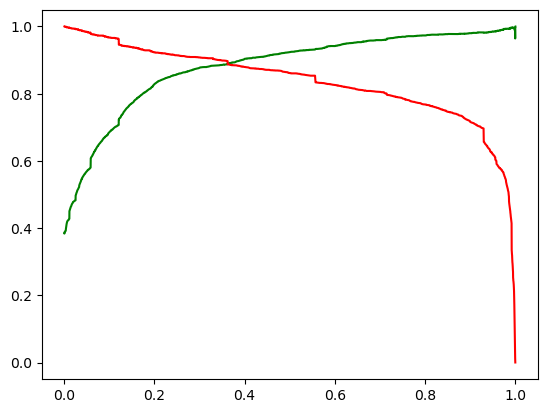

In [146]:
plt.plot(thresholds, p[:-1], 'g-')
plt.plot(thresholds, r[:-1], 'r-')
plt.show()

In [147]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score,final_predicted
0,0,0.003793,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.216374,0,1,1,1,0,0,0,0,0,0,0,0,22,0
2,0,0.004410,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.166767,0,1,1,0,0,0,0,0,0,0,0,0,17,0
4,0,0.025473,0,1,0,0,0,0,0,0,0,0,0,0,3,0


In [148]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9160482374768089

In [149]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

array([[3744,  258],
       [ 285, 2181]], dtype=int64)

In [150]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [151]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.8942189421894219

In [152]:
# Recall = TP / TP + FN
TP / (TP + FN)

0.8844282238442822

### Prediction on Test Set Again

In [153]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Converting it to df
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe 
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframe to append them side by  side
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append  y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df], axis=1)

# Renaming column
y_pred_final = y_pred_final.rename(columns = {0 : 'Conversion_prob'})
y_pred_final.head()

,Converted,Conversion_prob
0,1,0.706334
1,1,0.991749
2,1,0.934983
3,0,0.025473
4,1,0.929675


In [154]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final.head()

,Converted,Conversion_prob,final_predicted
0,1,0.706334,1
1,1,0.991749,1
2,1,0.934983,1
3,0,0.025473,0
4,1,0.929675,1


In [155]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.920995670995671

In [156]:
# Creating confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted)
confusion2

array([[1577,  100],
       [ 119,  976]], dtype=int64)

In [157]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [158]:
# Calculating the sensitivity
TP/(TP+FN)

0.891324200913242

In [159]:
# Calculating the specificity
TN/(TN+FP)

0.9403697078115683

In [160]:
# Precision = TP / TP + FP
TP / (TP+FP)

0.9070631970260223

In [161]:
# Recall = TP / TP + FN 
TP / (TP + FN)

0.891324200913242

## Final observations:

### Train set:

- Accuracy = 91.33%
- Sensitivity = 90.92%
- Specificity = 91.58%

### Test set:

- Accuracy = 92.1%
- Sensitivity = 89.13%
- Specificity = 94.04%

#### The model seems to predict the "Conversion rate and probability scores" very well, so as to give the owner of the company a batter way to manage the leads, in order to convert most of them.

---------------------------------------THE END-------------------------------------------------------------